In [1]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Meghalaya Insta Analysis\Twitter Analysis\overall_tweets_28_01.csv").fillna('')
df.head()

Unnamed: 0                 created_at                   id  \
0           0  2022-01-06 09:05:07+00:00  1479016167159197697   
1           1  2022-01-05 15:44:29+00:00  1478754283155701760   
2           2  2022-01-04 15:43:41+00:00  1478391693296689156   
3           3  2022-01-04 14:50:11+00:00  1478378229413171207   
4           4  2022-01-04 09:46:33+00:00  1478301818505416711   

                id_str                                          full_text  \
0  1479016167159197696  @SangmaConrad @PMOIndia I also condemn the way...   
1  1478754283155701760  I am saddened beyond words by the sudden demis...   
2  1478391693296689152  #Meghalaya | Meghalaya CM Conrad Sangma 3-day ...   
3  1478378229413171200  RT @NiteshRPradhan: Meghalaya CM @SangmaConrad...   
4  1478301818505416704  #Meghalaya | Meghalaya government to re-impose...   

   truncated display_text_range  \
0      False          [24, 299]   
1      False           [0, 279]   
2      False           [0, 235]   
3      False           [0, 144]   
4      False           [0, 254]   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [{'text': 'Meghalaya', 'indices':...   
2  {'hashtags': [{'text': 'Meghalaya', 'indices':...   
3  {'hashtags': [], 'symbols': [], 'user_mentions...   
4  {'hashtags': [{'text': 'Meghalaya', 'indices':...   

                                            metadata  \
0  {'iso_language_code': 'en', 'result_type': 're...   
1  {'iso_language_code': 'en', 'result_type': 're...   
2  {'iso_language_code': 'in', 'result_type': 're...   
3  {'iso_language_code': 'en', 'result_type': 're...   
4  {'iso_language_code': 'en', 'result_type': 're...   

                                              source  ... lang  \
0  <a href="http://twitter.com/download/android" ...  ...   en   
1  <a href="https://mobile.twitter.com" rel="nofo...  ...   en   
2  <a href="https://mobile.twitter.com" rel="nofo...  ...   in   
3  <a href="http://twitter.com/download/android" ...  ...   en   
4  <a href="http://twitter.com/download/android" ...  ...   en   

  possibly_sensitive                                   retweeted_status  \
0                                                                         
1                                                                         
2                0.0                                                      
3                     {'created_at': 'Tue Jan 04 07:15:33 +0000 2022...   
4                0.0                                                      

  extended_entities   search_term quoted_status_id quoted_status_id_str  \
0                    SangmaConrad                                         
1                    SangmaConrad                                         
2                    SangmaConrad                                         
3                    SangmaConrad                                         
4                    SangmaConrad                                         

  quoted_status                                            hashtag  \
0                                                               []   
1                                                    ['Meghalaya']   
2                ['Meghalaya', 'ConradSangma', 'Sikkimtour', 'G...   
3                                                               []   
4                ['Meghalaya', 'northeasttoday', 'Covid19', 'Om...   

                                            mentions  
0                       ['SangmaConrad', 'PMOIndia']  
1                                   ['SangmaConrad']  
2    ['SangmaConrad', 'PSTamangGolay', 'sikkimgovt']  
3  ['NiteshRPradhan', 'SangmaConrad', 'aaipkyairp...  
4                  ['CMO_Meghalaya', 'SangmaConrad']  

[5 rows x 35 columns]

In [3]:
df.columns

Index(['Unnamed: 0', 'created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'lang', 'possibly_sensitive',
       'retweeted_status', 'extended_entities', 'search_term',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'hashtag',
       'mentions'],
      dtype='object')

In [4]:
df.drop(['Unnamed: 0',"id","id_str","truncated",'display_text_range','entities','in_reply_to_status_id', 
         'in_reply_to_status_id_str','in_reply_to_user_id', 'in_reply_to_user_id_str','in_reply_to_screen_name', 'geo', 'coordinates',
         'contributors', 'is_quote_status','possibly_sensitive','quoted_status_id', 'quoted_status_id_str','quoted_status',
        'metadata','extended_entities','user','source'],axis=1,inplace=True)

In [5]:
df.head()

created_at  \
0  2022-01-06 09:05:07+00:00   
1  2022-01-05 15:44:29+00:00   
2  2022-01-04 15:43:41+00:00   
3  2022-01-04 14:50:11+00:00   
4  2022-01-04 09:46:33+00:00   

                                           full_text place  retweet_count  \
0  @SangmaConrad @PMOIndia I also condemn the way...                    0   
1  I am saddened beyond words by the sudden demis...                    0   
2  #Meghalaya | Meghalaya CM Conrad Sangma 3-day ...                    0   
3  RT @NiteshRPradhan: Meghalaya CM @SangmaConrad...                    2   
4  #Meghalaya | Meghalaya government to re-impose...                    0   

   favorite_count  favorited  retweeted lang  \
0               0      False      False   en   
1               9      False      False   en   
2               1      False      False   in   
3               0      False      False   en   
4               1      False      False   en   

                                    retweeted_status   search_term  \
0                                                     SangmaConrad   
1                                                     SangmaConrad   
2                                                     SangmaConrad   
3  {'created_at': 'Tue Jan 04 07:15:33 +0000 2022...  SangmaConrad   
4                                                     SangmaConrad   

                                             hashtag  \
0                                                 []   
1                                      ['Meghalaya']   
2  ['Meghalaya', 'ConradSangma', 'Sikkimtour', 'G...   
3                                                 []   
4  ['Meghalaya', 'northeasttoday', 'Covid19', 'Om...   

                                            mentions  
0                       ['SangmaConrad', 'PMOIndia']  
1                                   ['SangmaConrad']  
2    ['SangmaConrad', 'PSTamangGolay', 'sikkimgovt']  
3  ['NiteshRPradhan', 'SangmaConrad', 'aaipkyairp...  
4                  ['CMO_Meghalaya', 'SangmaConrad']

In [6]:
df1=df.copy()

In [7]:
df = df1[df1['lang'] == 'en']

In [8]:
df.dtypes

created_at          object
full_text           object
place               object
retweet_count        int64
favorite_count       int64
favorited             bool
retweeted             bool
lang                object
retweeted_status    object
search_term         object
hashtag             object
mentions            object
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6617 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   created_at        6617 non-null   object
 1   full_text         6617 non-null   object
 2   place             6617 non-null   object
 3   retweet_count     6617 non-null   int64 
 4   favorite_count    6617 non-null   int64 
 5   favorited         6617 non-null   bool  
 6   retweeted         6617 non-null   bool  
 7   lang              6617 non-null   object
 8   retweeted_status  6617 non-null   object
 9   search_term       6617 non-null   object
 10  hashtag           6617 non-null   object
 11  mentions          6617 non-null   object
dtypes: bool(2), int64(2), object(8)
memory usage: 581.6+ KB


In [10]:
import plotly.express as px
px.histogram(df, x="created_at",  nbins=100,opacity=.5,title="Tweets by date")

<AxesSubplot:>

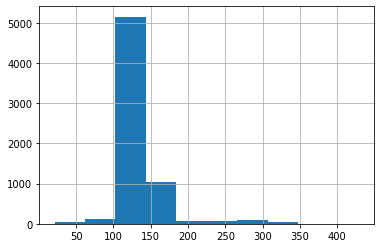

In [11]:
# Let's see the length of the tweets
seq_length = [len(i) for i in df['full_text']]

pd.Series(seq_length).hist(bins = 10)

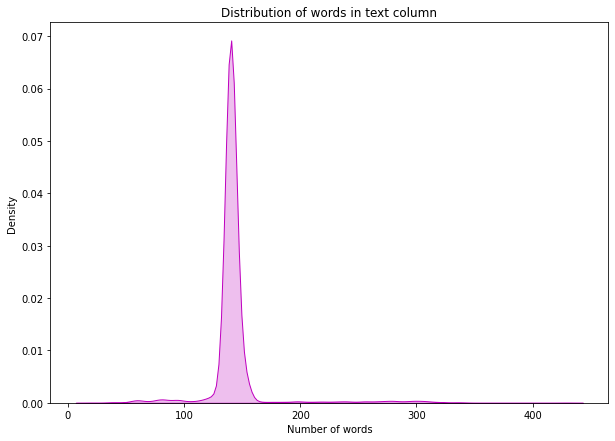

In [12]:
df["num of words in text"] = df["full_text"].apply(lambda x: len(x))
plt.figure(figsize=(10,7))
sns.kdeplot(df["num of words in text"],shade=True, color='m')
plt.title("Distribution of words in text column")
plt.xlabel("Number of words")
plt.show()

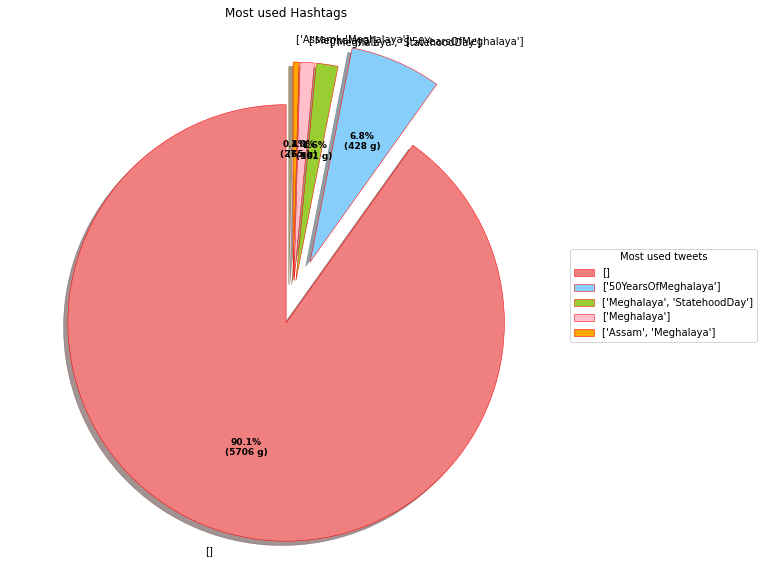

In [13]:
MostUsedTweets = df.hashtag.value_counts().sort_values(ascending=False)[:5]
colors = ['lightcoral', 'lightskyblue', 'yellowgreen', 'pink', 'orange']
explode = (0.1, 0.2, 0.1, 0.1, 0.1) 

# Wedge properties 
wp = { 'linewidth' : 0.5, 'edgecolor' : "red" }

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating the plot 
fig, ax = plt.subplots(figsize =(10, 10)) 
wedges, texts, autotexts = ax.pie(MostUsedTweets,  
                                  autopct = lambda pct: func(pct, MostUsedTweets), 
                                  explode = explode,  
                                  labels = MostUsedTweets.keys(), 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, MostUsedTweets.keys(), 
          title ="Most used tweets", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 


plt.setp(autotexts, size=9, weight="bold") 
ax.set_title("Most used Hashtags") 
plt.axis('equal')
plt.show()

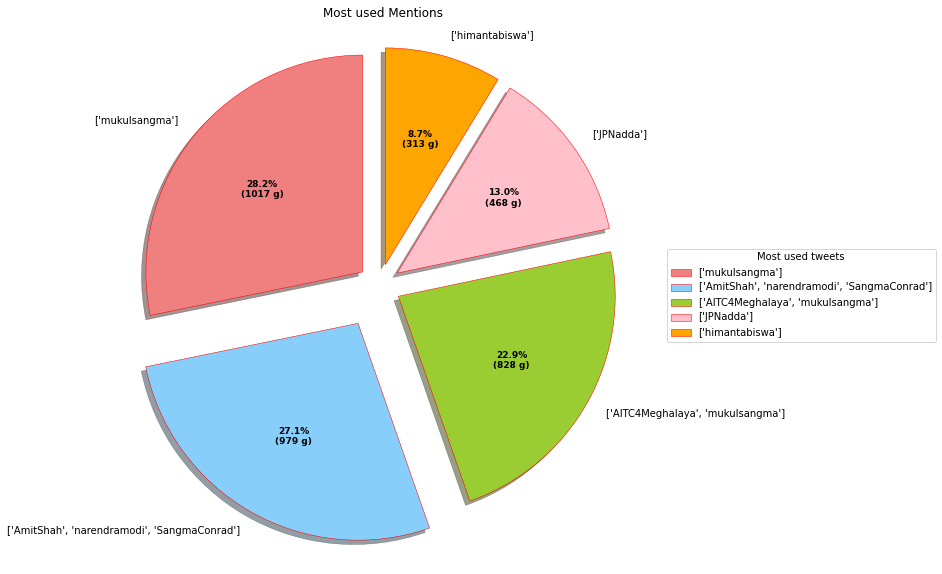

In [14]:
MostUsedTweets = df.mentions.value_counts().sort_values(ascending=False)[:5]
colors = ['lightcoral', 'lightskyblue', 'yellowgreen', 'pink', 'orange']
explode = (0.1, 0.2, 0.1, 0.1, 0.1) 

# Wedge properties 
wp = { 'linewidth' : 0.5, 'edgecolor' : "red" }

# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d} g)".format(pct, absolute) 
  
# Creating the plot 
fig, ax = plt.subplots(figsize =(10, 10)) 
wedges, texts, autotexts = ax.pie(MostUsedTweets,  
                                  autopct = lambda pct: func(pct, MostUsedTweets), 
                                  explode = explode,  
                                  labels = MostUsedTweets.keys(), 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
# Adding legend 
ax.legend(wedges, MostUsedTweets.keys(), 
          title ="Most used tweets", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 


plt.setp(autotexts, size=9, weight="bold") 
ax.set_title("Most used Mentions") 
plt.axis('equal')
plt.show()

In [15]:
import plotly.graph_objects as go
df['tweet_date']=pd.to_datetime(df['created_at']).dt.date
tweet_date=df['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)

fig=go.Figure(go.Scatter(x=tweet_date['date'],
                                y=tweet_date['count'],
                               mode='markers+lines',
                               name="Submissions",
                               marker_color='dodgerblue'))

fig.update_layout(
    title_text='Tweets per Day : ({} - {})'.format(df['tweet_date'].sort_values()[0].strftime("%d/%m/%Y"),
                                                       df['tweet_date'].sort_values().iloc[1].strftime("%d/%m/%Y")),template="plotly_dark",
    title_x=0.5)

fig.show()

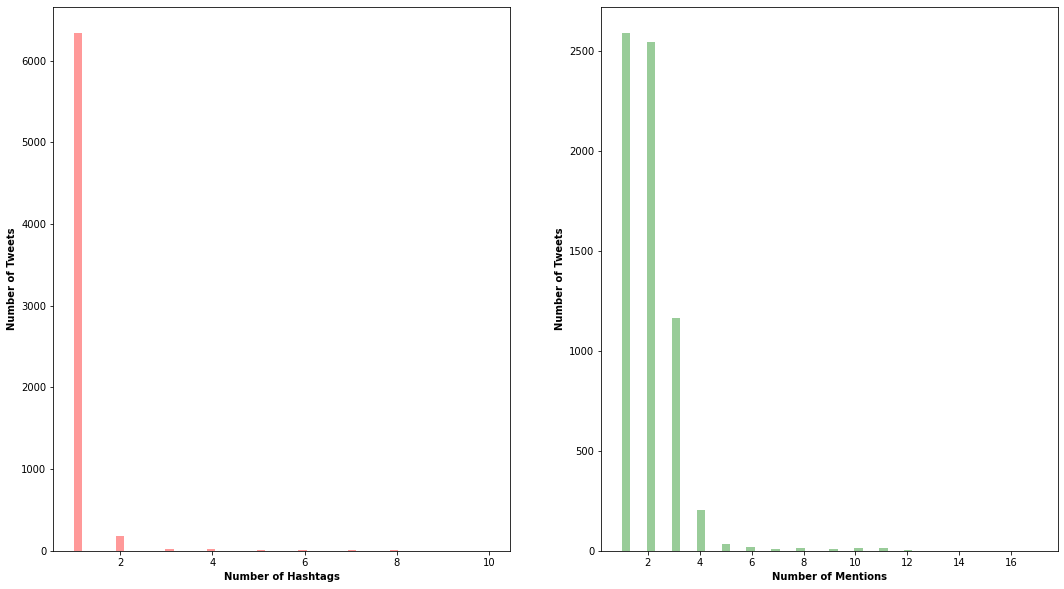

In [16]:
fig, ax = plt.subplots(1,2, figsize=(18, 10))

sns.distplot(df['hashtag'].dropna().apply(lambda x: len(x.split(','))).tolist(), kde=False, ax=ax[0], color='red')
sns.distplot(df['mentions'].dropna().apply(lambda x: len(x.split(','))).tolist(), kde=False, ax=ax[1], color='green')
ax[0].set_xlabel("Number of Hashtags", weight='bold')
ax[0].set_ylabel('Number of Tweets', weight='bold')
ax[1].set_xlabel("Number of Mentions", weight='bold')
ax[1].set_ylabel('Number of Tweets', weight='bold')
plt.show()

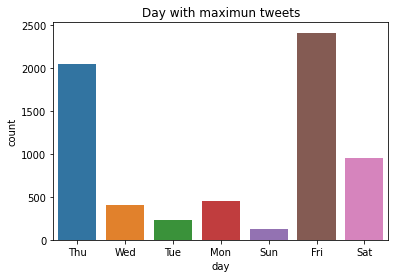

In [17]:
df["date"] = pd.to_datetime(df["created_at"])
df["Month"] = df["date"].apply(lambda x : x.month)
df["day"] = df["date"].apply(lambda x : x.dayofweek)
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df["day"] = df["day"].map(dmap)
plt.title("Day with maximun tweets")
ax2 = sns.countplot(df["day"])

In [18]:
# from collections import Counter
# y = df['retweeted']
# fig, ax = plt.subplots(figsize=(7, 7))
# count = Counter(y)
# ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
# ax.set_title('is_retweet?')
# plt.show()

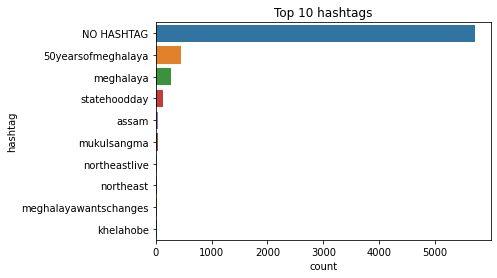

In [19]:
def split_hashtags(x): 
    return str(x).replace('[', '').replace(']', '').split(',')

df = df.copy()
df['hashtag'] = df['hashtag'].apply(lambda row : split_hashtags(row))
df = df.explode('hashtag')
df['hashtag'] = df['hashtag'].astype(str).str.lower().str.replace("'", '').str.replace(" ", '')
df.loc[df['hashtag']=='', 'hashtag'] = 'NO HASHTAG'


ds = df['hashtag'].value_counts().reset_index()
ds.columns = ['hashtag', 'count']
ds = ds.sort_values(['count'],ascending=False)
fig = sns.barplot(
    x=ds.head(10)["count"], 
    y=ds.head(10)['hashtag'], 
    orientation='horizontal', 
    #title='Top 20 hashtags', 
    #width=800, 
    #height=700
).set_title('Top 10 hashtags')
#fig.show()

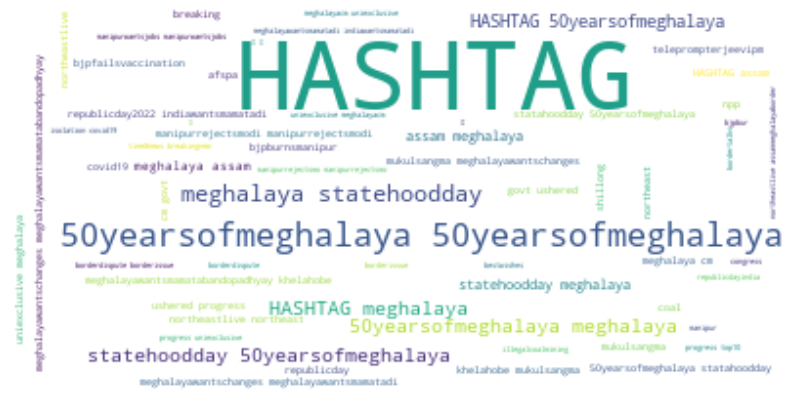

In [20]:
import itertools
from wordcloud import WordCloud

list_hashtags = df['hashtag'].dropna().str.lstrip('[').str.rstrip(']').str.replace("'", "").str.split(', ').tolist()
list_hashtags = list(itertools.chain(*list_hashtags))

plt.figure(figsize=(14,10))
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(list_hashtags))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [21]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=100,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

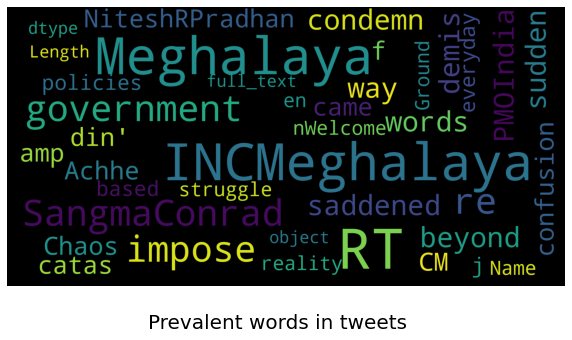

In [23]:
show_wordcloud(df['full_text'], title = 'Prevalent words in tweets')

In [24]:
text_list = df["full_text"].to_list()
text = ""
for i in text_list:
    text = text + i.split("https:")[0]
    
text = text.replace(" ",",")
text = re.sub("[\@\#\n\.\…\?\\\'\d\)\(\%\*]", ",", text)
text = re.sub(",{2,}", ",", text)

text[:1000]

',SangmaConrad,PMOIndia,I,also,condemn,the,way,farmers,were,stopped,from,entering,delhi,By,the,way,mr,cm,please,focus,on,your,state,create,job,opportunities,and,try,to,stop,corruption,and,intolerance,The,worst,government,Meghalaya,has,ever,witnessed,and,I,don,t,think,you,will,be,cm,again,bye,byeI,am,saddened,beyond,words,by,the,sudden,demise,of,Padma,Shri,Neil,Nongkynrih,founder,of,the,famous,Shillong,Chamber,Choir,He,was,a,mentor,to,the,country’s,finest,choir,that,serenaded,crowds,wherever,they,performed,We,have,lost,a,gem,today",tweeted,Meghalaya,CM,SangmaConradRT,NiteshRPradhan:,Meghalaya,CM,SangmaConrad,&amp;,family,arrived,in,Sikkim,today,at,aaipkyairport,for,personal,visit,thevoicesikkim,https,Meghalaya,|,Meghalaya,government,to,re-impose,fresh,restrictions,from,January,amid,omicron,scare,:,CM,Conrad,K,Sangma,CMO_Meghalaya,SangmaConrad,northeasttoday,Covid,Omicronscare,newguidelines,MeghalayaGovernment,Meghalaya,|,Meghalaya,government,to,re-impose,fresh,restrictions,from,January,

In [25]:
text = text.split(',')
text[:10]

['',
 'SangmaConrad',
 'PMOIndia',
 'I',
 'also',
 'condemn',
 'the',
 'way',
 'farmers',
 'were']

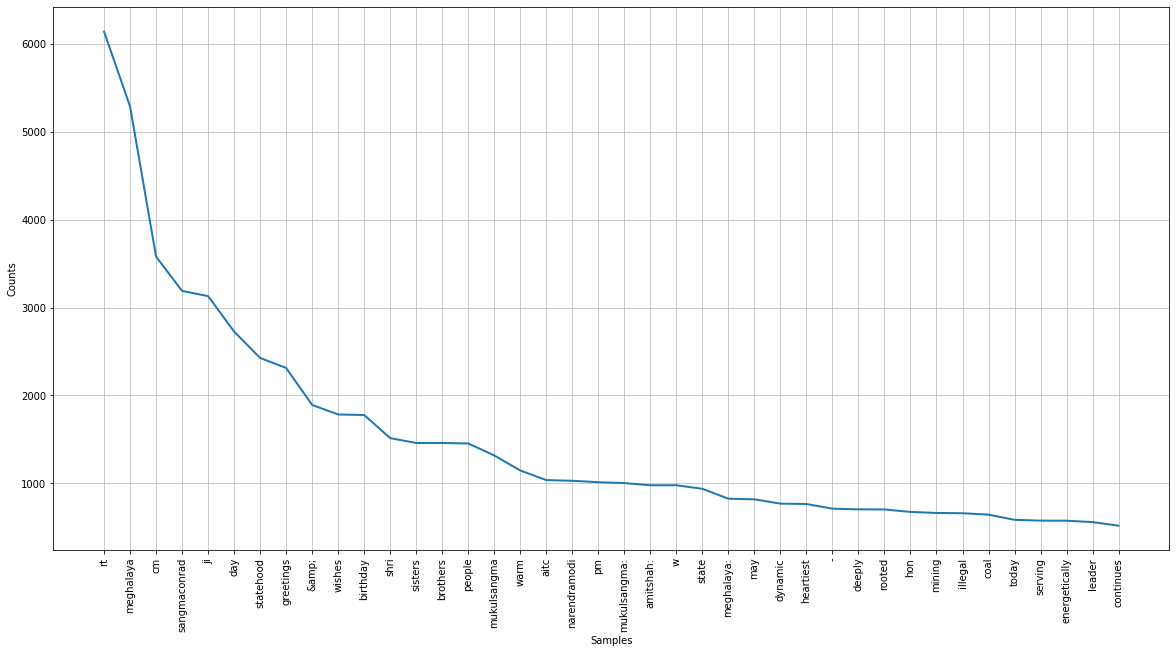

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
import re
from wordcloud import WordCloud
import nltk
import string
from nltk.corpus import stopwords
from nltk.probability import FreqDist

def stop_w(x):
    new_s = []
    for i in text:
        if i.lower() not in stopwords.words("english"):
            new_s.append(i.lower())
    return new_s

text = stop_w(text)

plt.figure(figsize=(20,10))
FreqDist(text).plot(40)

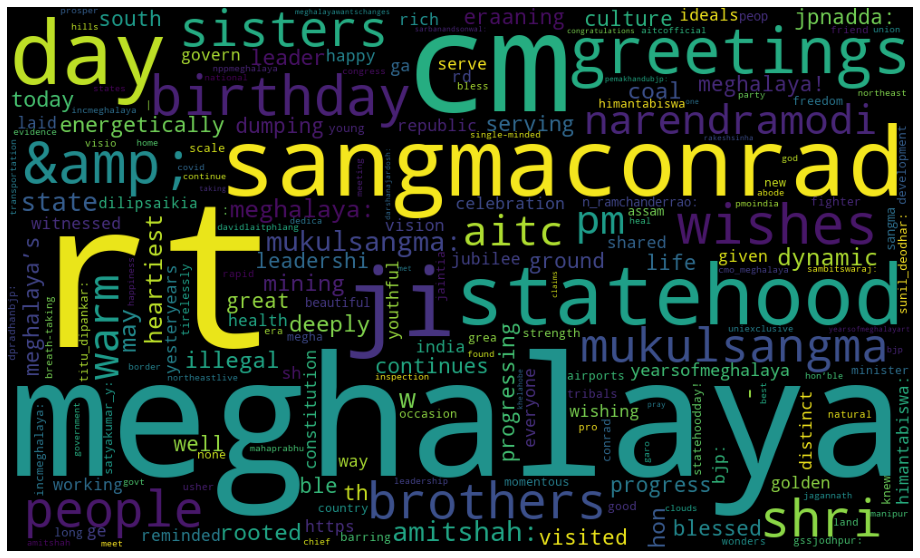

In [27]:
text_count = pd.Series(text).value_counts()
wc = WordCloud(width=1000, height=600, background_color="black", random_state=0)
plt.figure(figsize=(20,10),facecolor='w')
plt.imshow(wc.generate_from_frequencies(text_count))
plt.axis("off")
plt.show()

In [28]:
from sklearn.decomposition import TruncatedSVD,PCA
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from wordcloud import WordCloud,STOPWORDS
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import random
plt.rc('figure',figsize=(17,13))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
stop_words = (set(stopwords.words('english')))
sno = SnowballStemmer('english')

def remove_html_tags(sentence):
    regex = re.compile(pattern='<.*?>')
    clean_text = re.sub(regex, ' ', sentence)
    return clean_text

def remove_punctuations(word):
    cleaned_sentence = re.sub(pattern=r'[?|!|\|"|#|\']', repl=r'', string=word)
    cleaned_sentence = re.sub(pattern=r'[.|,|)|(|\|/]', repl=r'', string=cleaned_sentence)
    return cleaned_sentence

def get_preprocessed_data(data, feature, cleaned_feature):
        
        i = 0
        final_string = []

        sentences = data[feature].values
        for sentence in sentences:
            filtered_sentence = []
            sentence = remove_html_tags(sentence)
            for word in sentence.split():
                for clean_word in remove_punctuations(word).split():
                    if clean_word.isalpha() and len(clean_word) > 2:
                        if clean_word.lower() not in stop_words:
                            s = (sno.stem(clean_word.lower()))
                            filtered_sentence.append(s)

            string = " ".join(filtered_sentence)
            final_string.append(string)
            i += 1
        data[cleaned_feature] = final_string
        return data

data = get_preprocessed_data(df, 'full_text', 'Tidy Tweet')
data = get_preprocessed_data(df, 'hashtag', 'Tidy hashtags')

Positive    5507
Neutral     1080
Negative     622
Name: Sentiment, dtype: int64


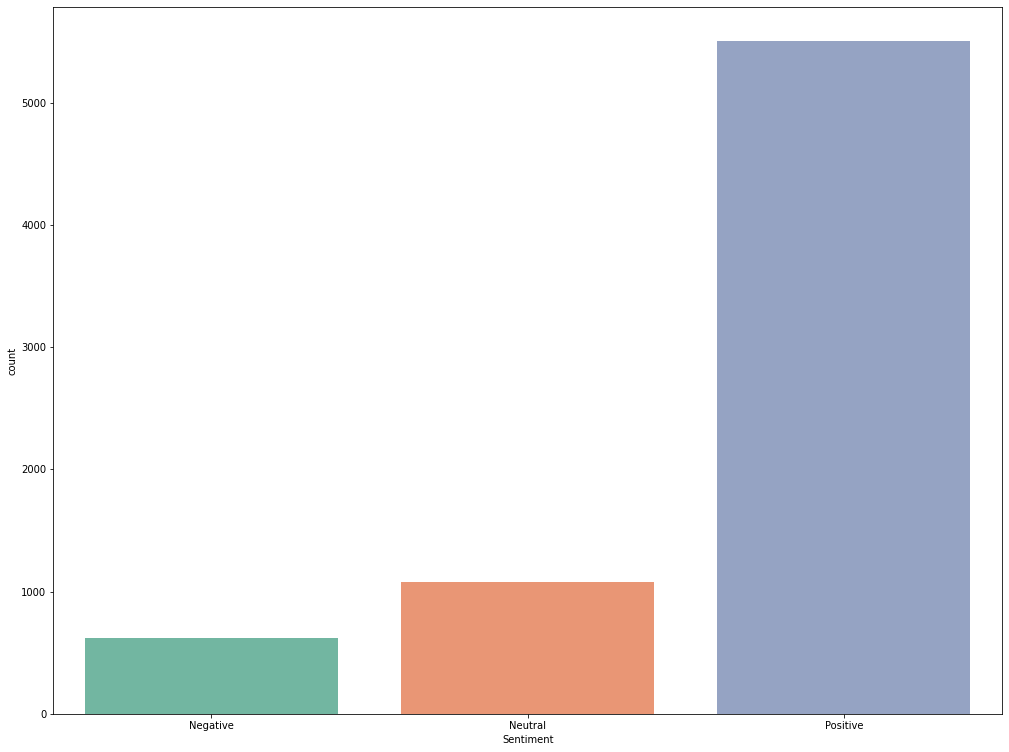

In [30]:
sentiment = SentimentIntensityAnalyzer()
def get_sentiment(data):
    sentiment_list = []
    for text in list(data['Tidy Tweet'].values):
        if sentiment.polarity_scores(text)["compound"] > 0:
            sentiment_list.append("Positive")
        elif sentiment.polarity_scores(text)["compound"] < 0:
            sentiment_list.append("Negative")
        else:
            sentiment_list.append("Neutral")
    return sentiment_list
        
data['Sentiment'] = get_sentiment(data)
sns.countplot(x="Sentiment", data=data, palette="Set2")
print(data.Sentiment.value_counts())

In [31]:
def get_word_cloud(sentiment):
    stop_words = (set(stopwords.words('english')))
    remove_words = ['mukulsangma', 'rt', 'coronavirus', 'knew', 'megha', '&amp', 'none','photo','httweets','sunil_deodhar:','k']
    stop_words = remove_words + list(stop_words)
    plt.figure(figsize=[15,15])
    clean_tweets= "".join(list(data[data['Sentiment']==sentiment]['Tidy Tweet'].values))
    wordcloud = WordCloud(width=700,height=400, background_color='white',colormap='plasma', max_words=30, stopwords=stop_words, collocations=False).generate(clean_tweets)
    plt.title(f"Top 30 {sentiment} words used in tweets", fontsize=20)
    plt.imshow(wordcloud)
    return plt.show()

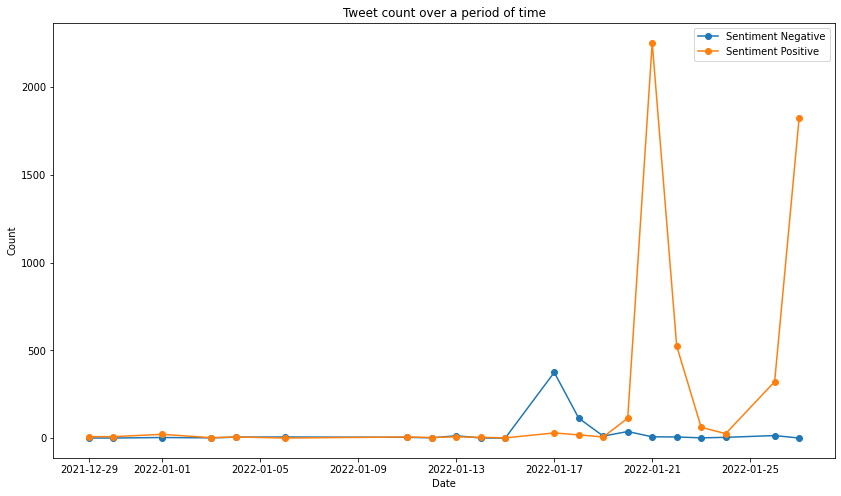

In [32]:
data['date'] = pd.to_datetime(data['date']).dt.date
negative_data = data[data['Sentiment']=='Negative'].reset_index()
positive_data = data[data['Sentiment']=='Positive'].reset_index()
grouped_data_neg = negative_data.groupby('date')['Sentiment'].count().reset_index()
grouped_data_pos = positive_data.groupby('date')['Sentiment'].count().reset_index()
merged_data = pd.merge(grouped_data_neg, grouped_data_pos, left_on='date', right_on='date', suffixes=(' Negative', ' Positive'))

ax1 = merged_data.plot(x='date', y=['Sentiment Negative', 'Sentiment Positive'], figsize=(14, 8), marker='o', xlabel='Date', ylabel='Count', title='Tweet count over a period of time')


In [33]:
data.text = data.full_text.apply(lambda x:re.sub('@[^\s]+','',x))

#remove hashtags
data.text = data.full_text.apply(lambda x:re.sub(r'\B#\S+','',x))


# Remove URLS
data.text = data.full_text.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
data.text = data.full_text.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
data.text = data.full_text.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
data.text = data.full_text.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

In [34]:
sid = SIA()
data['sentiments']           = data['full_text'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
data['Positive Sentiment']   = data['sentiments'].apply(lambda x: x['pos']+1*(10**-6)) 
data['Neutral Sentiment']    = data['sentiments'].apply(lambda x: x['neu']+1*(10**-6))
data['Negative Sentiment']   = data['sentiments'].apply(lambda x: x['neg']+1*(10**-6))

data.drop(columns=['sentiments'],inplace=True)

In [35]:
data.head()

created_at  \
0  2022-01-06 09:05:07+00:00   
1  2022-01-05 15:44:29+00:00   
3  2022-01-04 14:50:11+00:00   
4  2022-01-04 09:46:33+00:00   
4  2022-01-04 09:46:33+00:00   

                                           full_text place  retweet_count  \
0  @SangmaConrad @PMOIndia I also condemn the way...                    0   
1  I am saddened beyond words by the sudden demis...                    0   
3  RT @NiteshRPradhan: Meghalaya CM @SangmaConrad...                    2   
4  #Meghalaya | Meghalaya government to re-impose...                    0   
4  #Meghalaya | Meghalaya government to re-impose...                    0   

   favorite_count  favorited  retweeted lang  \
0               0      False      False   en   
1               9      False      False   en   
3               0      False      False   en   
4               1      False      False   en   
4               1      False      False   en   

                                    retweeted_status   search_term  ...  \
0                                                     SangmaConrad  ...   
1                                                     SangmaConrad  ...   
3  {'created_at': 'Tue Jan 04 07:15:33 +0000 2022...  SangmaConrad  ...   
4                                                     SangmaConrad  ...   
4                                                     SangmaConrad  ...   

   tweet_date        date  Month  day  \
0  2022-01-06  2022-01-06      1  Thu   
1  2022-01-05  2022-01-05      1  Wed   
3  2022-01-04  2022-01-04      1  Tue   
4  2022-01-04  2022-01-04      1  Tue   
4  2022-01-04  2022-01-04      1  Tue   

                                          Tidy Tweet   Tidy hashtags  \
0  also condemn way farmer stop enter delhi way p...         hashtag   
1  sadden beyond word sudden demis padma shri nei...       meghalaya   
3   meghalaya famili arriv sikkim today person visit         hashtag   
4  meghalaya meghalaya govern fresh restrict janu...       meghalaya   
4  meghalaya meghalaya govern fresh restrict janu...  northeasttoday   

  Sentiment Positive Sentiment Neutral Sentiment Negative Sentiment  
0  Negative           0.117001          0.702001           0.181001  
1  Negative           0.000001          0.878001           0.122001  
3   Neutral           0.000001          1.000001           0.000001  
4  Negative           0.075001          0.749001           0.176001  
4  Negative           0.075001          0.749001           0.176001  

[5 rows x 23 columns]

In [36]:
#Number of Words
data['Number_Of_Words'] = data.text.apply(lambda x:len(x.split(' ')))
#Average Word Length
data['Mean_Word_Length'] = data.text.apply(lambda x:np.round(np.mean([len(w) for w in x.split(' ')]),2) )

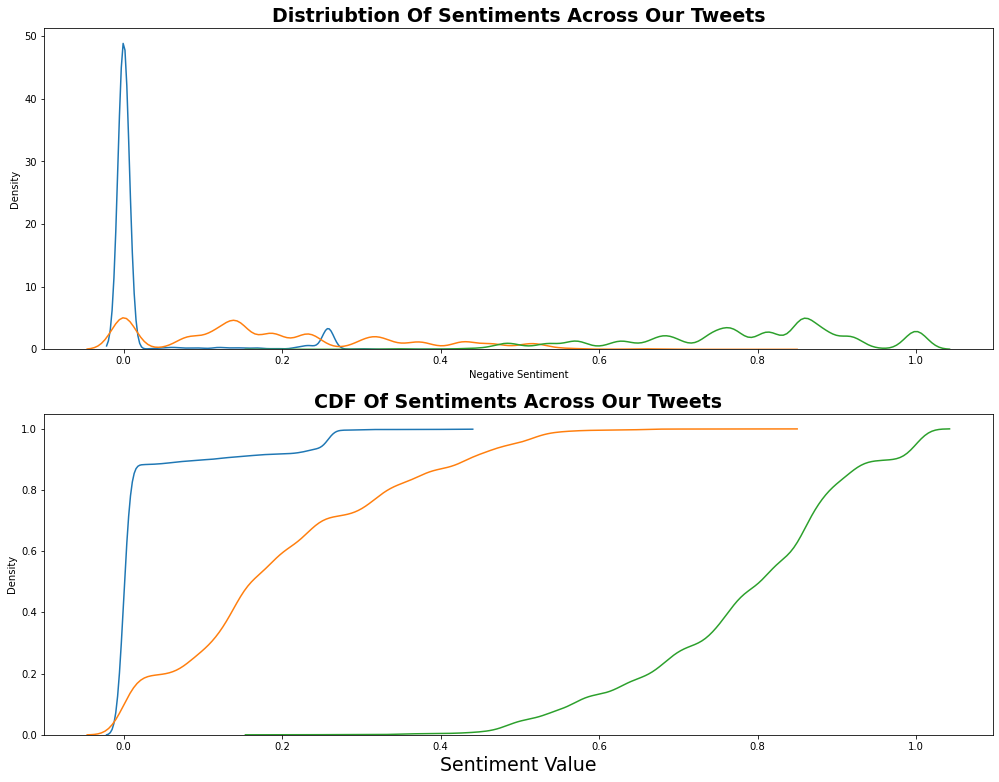

In [37]:
plt.subplot(2,1,1)
plt.title('Distriubtion Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1)
sns.kdeplot(data['Positive Sentiment'],bw=0.1)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1)
plt.subplot(2,1,2)
plt.title('CDF Of Sentiments Across Our Tweets',fontsize=19,fontweight='bold')
sns.kdeplot(data['Negative Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Positive Sentiment'],bw=0.1,cumulative=True)
sns.kdeplot(data['Neutral Sentiment'],bw=0.1,cumulative=True)
plt.xlabel('Sentiment Value',fontsize=19)
plt.show()

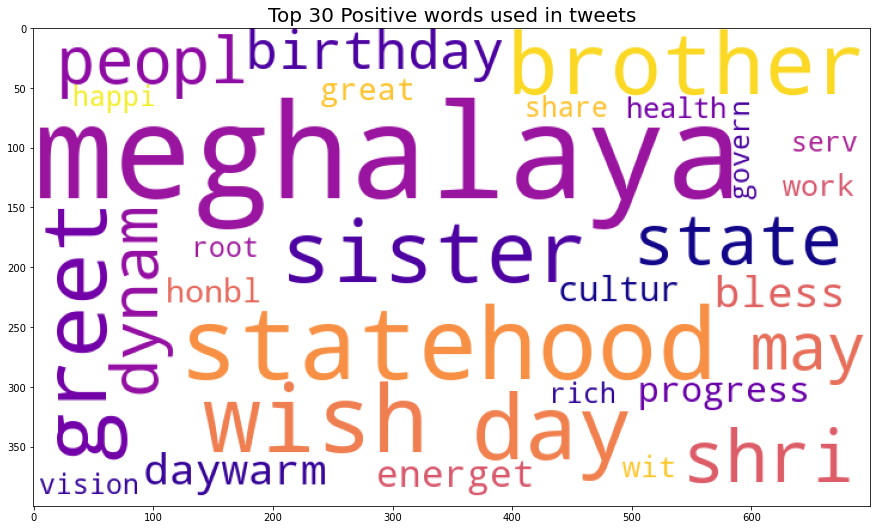

In [38]:
get_word_cloud(sentiment='Positive')

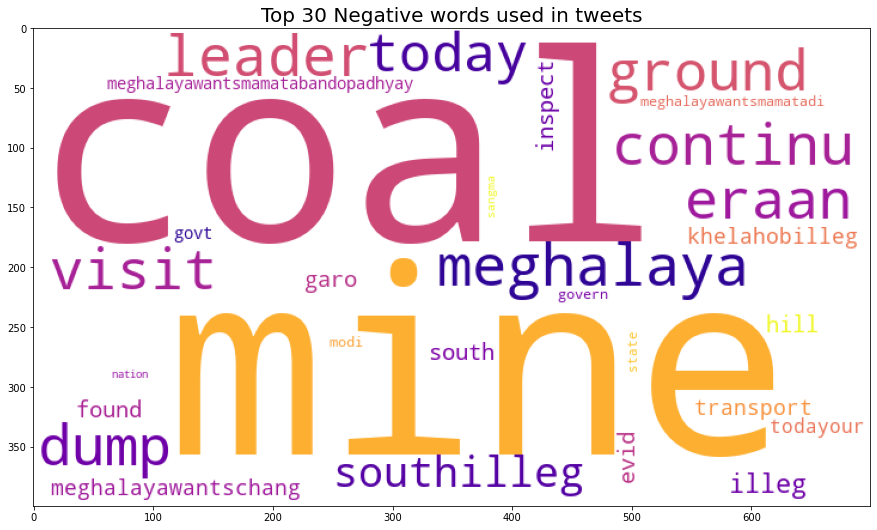

In [39]:
get_word_cloud(sentiment='Negative')

In [40]:
from plotly.subplots import make_subplots

b_date_mean = data.groupby(by='date').mean().reset_index()
b_date_std = data.groupby(by='date').std().reset_index()


fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Daily Average Positive Sentiment',  'Daily Average Negative Sentiment'))

fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Positive Sentiment'],name='Positive Sentiment Mean'),
    row=1, col=1
)

    
#positive mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Positive Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Positive Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean'
)

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['Positive Sentiment'].mean(),
            text=r"$\mu : {:.2f}$".format(b_date_mean['Positive Sentiment'].mean()),
            showarrow=True,
            arrowhead=3,
            yshift=10)



fig.add_trace(
    go.Scatter(x=b_date_mean['date'], y=b_date_mean['Negative Sentiment'],name='Negative Sentiment Mean'),
    row=2, col=1
)

#negative mean
fig.add_shape(type="line",
    x0=b_date_mean['date'].values[0], y0=b_date_mean['Negative Sentiment'].mean(), x1=b_date_mean['date'].values[-1], y1=b_date_mean['Negative Sentiment'].mean(),
    line=dict(
        color="Red",
        width=2,
        dash="dashdot",
    ),
        name='Mean',
        xref='x2', 
        yref='y2'
)

fig.add_annotation(x=b_date_mean['date'].values[3], y=b_date_mean['Negative Sentiment'].mean(),
            text=r"$\mu : {:.2f}$".format(b_date_mean['Negative Sentiment'].mean()),
            showarrow=True,
            arrowhead=3,
            yshift=10,
            xref='x2', 
            yref='y2')



fig.add_annotation(x=b_date_mean['date'].values[5], y=b_date_mean['Negative Sentiment'].mean()+0.01,
            text=r"Start Of Decline",
            showarrow=True,
            arrowhead=6,
            yshift=10,
            xref='x2', 
            yref='y2')

fig.add_annotation(x=b_date_mean['date'].values[15], y=.024,
            text=r"Start Of Incline",
            showarrow=True,
            arrowhead=6,
            yshift=10,
            xref='x2', 
            yref='y2')

fig['layout']['xaxis2']['title'] = 'Date'
fig.update_layout(height=700, width=900, title_text="Sentiment Average Change With Time")
fig.show()

In [41]:
def clean_text(text):    
    text = str(text).lower()
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    
    return text
data['text'] = data['full_text'].apply(lambda x:clean_text(x))

In [42]:
data['text']


0       sangmaconrad pmoindia i also condemn the way f...
1       i am saddened beyond words by the sudden demis...
3       rt niteshrpradhan meghalaya cm sangmaconrad am...
4       meghalaya  meghalaya government to reimpose fr...
4       meghalaya  meghalaya government to reimpose fr...
                              ...                        
7247    rt incmeghalaya chaos confusion amp catastroph...
7248    rt incmeghalaya achhe din came but only for mo...
7250    rt incmeghalaya when policies are based on jum...
7251    rt incmeghalaya your everyday struggle to ensu...
7252    rt incmeghalaya ground reality\nwelcome to meh...
Name: text, Length: 7209, dtype: object

In [43]:
df=pd.DataFrame()
df['text']=data['text']
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['tokenized'] = df['text'].apply(lambda x: tokenization(x.lower()))
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
df['No_stopwords'] = df['tokenized'].apply(lambda x: remove_stopwords(x))

ps = nltk.PorterStemmer()

def stemming1(text):
    text = [ps.stem(word) for word in text]
    return text

df['stemmed_porter'] = df['No_stopwords'].apply(lambda x: stemming1(x))

from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')
def stemming2(text):
    text = [s_stemmer.stem(word) for word in text]
    return text
df['stemmed_snowball'] = df['No_stopwords'].apply(lambda x: stemming2(x))

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['lemmatized'] = df['No_stopwords'].apply(lambda x: lemmatizer(x))

In [44]:
df.head()

text  \
0  sangmaconrad pmoindia i also condemn the way f...   
1  i am saddened beyond words by the sudden demis...   
3  rt niteshrpradhan meghalaya cm sangmaconrad am...   
4  meghalaya  meghalaya government to reimpose fr...   
4  meghalaya  meghalaya government to reimpose fr...   

                                           tokenized  \
0  [sangmaconrad, pmoindia, i, also, condemn, the...   
1  [i, am, saddened, beyond, words, by, the, sudd...   
3  [rt, niteshrpradhan, meghalaya, cm, sangmaconr...   
4  [meghalaya, meghalaya, government, to, reimpos...   
4  [meghalaya, meghalaya, government, to, reimpos...   

                                        No_stopwords  \
0  [sangmaconrad, pmoindia, also, condemn, way, f...   
1  [saddened, beyond, words, sudden, demise, padm...   
3  [rt, niteshrpradhan, meghalaya, cm, sangmaconr...   
4  [meghalaya, meghalaya, government, reimpose, f...   
4  [meghalaya, meghalaya, government, reimpose, f...   

                                      stemmed_porter  \
0  [sangmaconrad, pmoindia, also, condemn, way, f...   
1  [sadden, beyond, word, sudden, demis, padma, s...   
3  [rt, niteshrpradhan, meghalaya, cm, sangmaconr...   
4  [meghalaya, meghalaya, govern, reimpos, fresh,...   
4  [meghalaya, meghalaya, govern, reimpos, fresh,...   

                                    stemmed_snowball  \
0  [sangmaconrad, pmoindia, also, condemn, way, f...   
1  [sadden, beyond, word, sudden, demis, padma, s...   
3  [rt, niteshrpradhan, meghalaya, cm, sangmaconr...   
4  [meghalaya, meghalaya, govern, reimpos, fresh,...   
4  [meghalaya, meghalaya, govern, reimpos, fresh,...   

                                          lemmatized  
0  [sangmaconrad, pmoindia, also, condemn, way, f...  
1  [saddened, beyond, word, sudden, demise, padma...  
3  [rt, niteshrpradhan, meghalaya, cm, sangmaconr...  
4  [meghalaya, meghalaya, government, reimpose, f...  
4  [meghalaya, meghalaya, government, reimpose, f...

In [45]:
data['text']=df['lemmatized']
data.head()

created_at  \
0  2022-01-06 09:05:07+00:00   
1  2022-01-05 15:44:29+00:00   
3  2022-01-04 14:50:11+00:00   
4  2022-01-04 09:46:33+00:00   
4  2022-01-04 09:46:33+00:00   

                                           full_text place  retweet_count  \
0  @SangmaConrad @PMOIndia I also condemn the way...                    0   
1  I am saddened beyond words by the sudden demis...                    0   
3  RT @NiteshRPradhan: Meghalaya CM @SangmaConrad...                    2   
4  #Meghalaya | Meghalaya government to re-impose...                    0   
4  #Meghalaya | Meghalaya government to re-impose...                    0   

   favorite_count  favorited  retweeted lang  \
0               0      False      False   en   
1               9      False      False   en   
3               0      False      False   en   
4               1      False      False   en   
4               1      False      False   en   

                                    retweeted_status   search_term  ...  day  \
0                                                     SangmaConrad  ...  Thu   
1                                                     SangmaConrad  ...  Wed   
3  {'created_at': 'Tue Jan 04 07:15:33 +0000 2022...  SangmaConrad  ...  Tue   
4                                                     SangmaConrad  ...  Tue   
4                                                     SangmaConrad  ...  Tue   

                                          Tidy Tweet   Tidy hashtags  \
0  also condemn way farmer stop enter delhi way p...         hashtag   
1  sadden beyond word sudden demis padma shri nei...       meghalaya   
3   meghalaya famili arriv sikkim today person visit         hashtag   
4  meghalaya meghalaya govern fresh restrict janu...       meghalaya   
4  meghalaya meghalaya govern fresh restrict janu...  northeasttoday   

  Sentiment Positive Sentiment  Neutral Sentiment Negative Sentiment  \
0  Negative           0.117001           0.702001           0.181001   
1  Negative           0.000001           0.878001           0.122001   
3   Neutral           0.000001           1.000001           0.000001   
4  Negative           0.075001           0.749001           0.176001   
4  Negative           0.075001           0.749001           0.176001   

  Number_Of_Words Mean_Word_Length  \
0              51             4.84   
1              46             5.09   
3              18             7.06   
4              27             8.30   
4              27             8.30   

                                                text  
0  [sangmaconrad, pmoindia, also, condemn, way, f...  
1  [saddened, beyond, word, sudden, demise, padma...  
3  [rt, niteshrpradhan, meghalaya, cm, sangmaconr...  
4  [meghalaya, meghalaya, government, reimpose, f...  
4  [meghalaya, meghalaya, government, reimpose, f...  

[5 rows x 26 columns]

In [46]:
temp = data.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Greens')

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

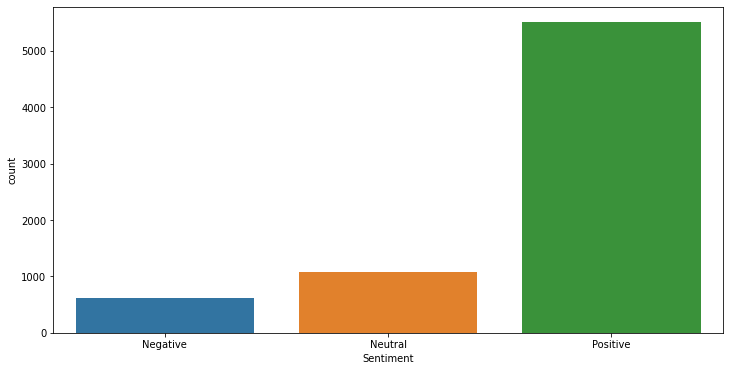

In [47]:
plt.figure(figsize=(12,6)) 
sns.countplot(x='Sentiment',data=data)
# fig = go.Figure(go.Funnelarea(
#     text =temp.Sentiment,
#     values = temp.text,
#     title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
#     ))
# fig.show()

<Figure size 2880x720 with 0 Axes>

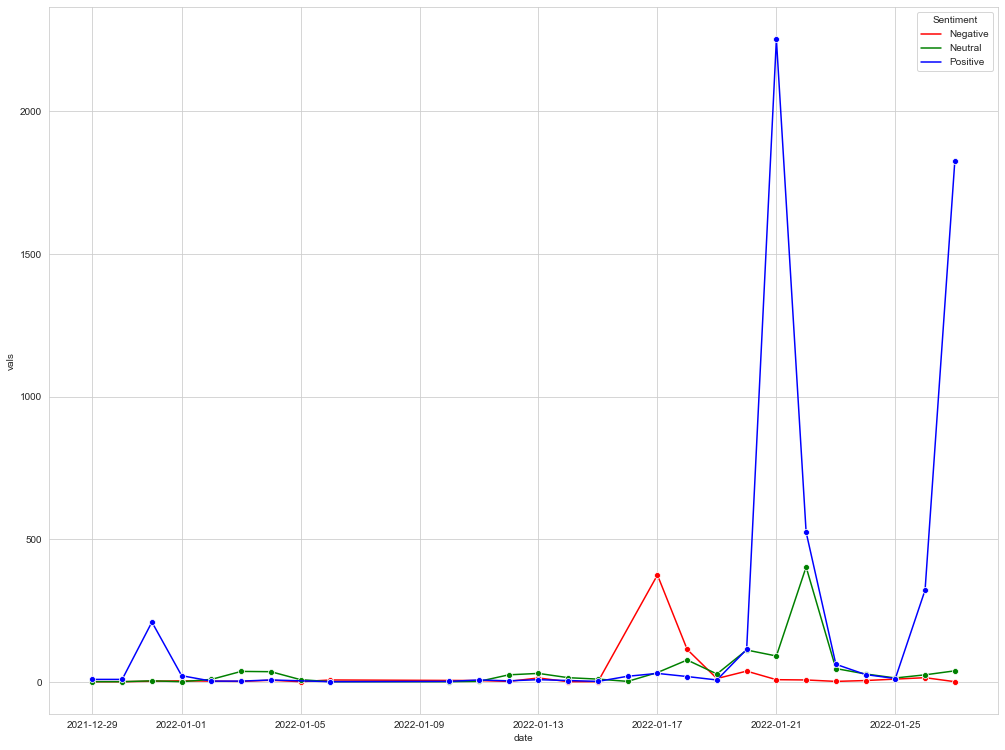

<Figure size 2880x720 with 0 Axes>

In [48]:
data["date"] = pd.to_datetime(data.date) 
timeline = data.resample('D', on='date')["Sentiment"].value_counts().unstack(1)

timeline.reset_index(inplace=True)

timeline = timeline.melt("date", var_name='Sentiment',  value_name='vals')

sns.set_style("whitegrid")
sns.lineplot(x="date", y="vals", hue="Sentiment",marker='o', data=timeline, palette=["r", "g","b"])
plt.figure(figsize=(40,10))

In [49]:
for politician in data.search_term.unique():
    print(politician)

SangmaConrad
MukulSangma
NPPPARTY
INCPARTY


In [50]:
for politician in data.created_at.unique():
    print(politician)

2022-01-06 09:05:07+00:00
2022-01-05 15:44:29+00:00
2022-01-04 14:50:11+00:00
2022-01-04 09:46:33+00:00
2022-01-04 09:06:07+00:00
2022-01-04 07:15:50+00:00
2022-01-04 07:15:33+00:00
2022-01-04 02:27:44+00:00
2022-01-04 02:18:00+00:00
2022-01-03 16:45:18+00:00
2022-01-03 14:28:05+00:00
2022-01-03 13:53:56+00:00
2022-01-03 13:30:04+00:00
2022-01-03 10:37:40+00:00
2022-01-02 16:34:17+00:00
2021-12-31 11:30:25+00:00
2021-12-31 04:02:46+00:00
2021-12-30 23:37:58+00:00
2021-12-30 10:59:51+00:00
2021-12-30 05:05:16+00:00
2021-12-29 16:07:41+00:00
2021-12-29 12:57:52+00:00
2021-12-29 12:54:52+00:00
2021-12-29 12:54:10+00:00
2022-01-06 16:13:07+00:00
2022-01-06 05:50:53+00:00
2022-01-05 03:38:40+00:00
2022-01-04 17:53:53+00:00
2022-01-04 13:07:48+00:00
2022-01-04 09:54:43+00:00
2022-01-04 09:48:43+00:00
2022-01-04 07:13:43+00:00
2022-01-03 14:35:12+00:00
2022-01-03 14:07:27+00:00
2022-01-03 13:14:24+00:00
2022-01-03 13:14:18+00:00
2022-01-03 13:14:12+00:00
2022-01-03 13:14:05+00:00
2022-01-03 1

2022-01-27 07:29:23+00:00
2022-01-27 07:29:16+00:00
2022-01-27 07:28:46+00:00
2022-01-27 07:28:44+00:00
2022-01-27 07:28:43+00:00
2022-01-27 07:26:39+00:00
2022-01-27 07:25:46+00:00
2022-01-27 07:25:44+00:00
2022-01-27 07:25:23+00:00
2022-01-27 07:25:19+00:00
2022-01-27 07:25:10+00:00
2022-01-27 07:24:40+00:00
2022-01-27 07:24:05+00:00
2022-01-27 07:23:29+00:00
2022-01-27 07:23:24+00:00
2022-01-27 07:23:07+00:00
2022-01-27 07:22:56+00:00
2022-01-27 07:22:43+00:00
2022-01-27 07:21:53+00:00
2022-01-27 07:21:37+00:00
2022-01-27 07:21:15+00:00
2022-01-27 07:21:07+00:00
2022-01-27 07:20:36+00:00
2022-01-27 07:20:25+00:00
2022-01-27 07:20:23+00:00
2022-01-27 07:20:22+00:00
2022-01-27 07:19:54+00:00
2022-01-27 07:19:24+00:00
2022-01-27 07:19:21+00:00
2022-01-27 07:18:43+00:00
2022-01-27 07:17:47+00:00
2022-01-27 07:17:33+00:00
2022-01-27 07:17:16+00:00
2022-01-27 07:16:37+00:00
2022-01-27 07:16:36+00:00
2022-01-27 07:16:34+00:00
2022-01-27 07:16:28+00:00
2022-01-27 07:16:25+00:00
2022-01-27 0

2022-01-26 07:12:12+00:00
2022-01-26 07:08:50+00:00
2022-01-26 07:07:30+00:00
2022-01-26 07:06:22+00:00
2022-01-26 07:05:26+00:00
2022-01-26 07:02:00+00:00
2022-01-26 07:00:23+00:00
2022-01-26 06:57:27+00:00
2022-01-26 06:57:12+00:00
2022-01-26 06:51:56+00:00
2022-01-26 06:51:38+00:00
2022-01-26 06:48:29+00:00
2022-01-26 06:48:11+00:00
2022-01-26 06:46:54+00:00
2022-01-26 06:46:43+00:00
2022-01-26 06:45:47+00:00
2022-01-26 06:45:07+00:00
2022-01-26 06:43:04+00:00
2022-01-26 06:39:51+00:00
2022-01-26 06:36:48+00:00
2022-01-26 06:35:58+00:00
2022-01-26 06:35:45+00:00
2022-01-26 06:34:13+00:00
2022-01-26 06:33:44+00:00
2022-01-26 06:23:00+00:00
2022-01-26 06:18:37+00:00
2022-01-26 06:16:32+00:00
2022-01-26 06:14:25+00:00
2022-01-26 06:12:09+00:00
2022-01-26 06:11:40+00:00
2022-01-26 06:10:37+00:00
2022-01-26 06:09:45+00:00
2022-01-26 06:07:32+00:00
2022-01-26 06:03:29+00:00
2022-01-26 06:02:22+00:00
2022-01-26 06:01:12+00:00
2022-01-26 06:00:20+00:00
2022-01-26 05:58:06+00:00
2022-01-26 0

2022-01-22 13:20:19+00:00
2022-01-22 13:19:39+00:00
2022-01-22 13:19:28+00:00
2022-01-22 13:06:18+00:00
2022-01-22 12:58:40+00:00
2022-01-22 12:58:35+00:00
2022-01-22 12:58:31+00:00
2022-01-22 12:54:53+00:00
2022-01-22 12:54:48+00:00
2022-01-22 12:47:43+00:00
2022-01-22 12:42:27+00:00
2022-01-22 12:42:11+00:00
2022-01-22 12:42:03+00:00
2022-01-22 12:42:00+00:00
2022-01-22 12:41:55+00:00
2022-01-22 12:31:41+00:00
2022-01-22 12:24:42+00:00
2022-01-22 12:24:38+00:00
2022-01-22 12:23:01+00:00
2022-01-22 12:22:48+00:00
2022-01-22 12:22:27+00:00
2022-01-22 12:22:13+00:00
2022-01-22 12:22:12+00:00
2022-01-22 12:22:09+00:00
2022-01-22 12:22:00+00:00
2022-01-22 12:21:58+00:00
2022-01-22 12:21:39+00:00
2022-01-22 12:21:00+00:00
2022-01-22 12:15:55+00:00
2022-01-22 12:15:19+00:00
2022-01-22 12:11:48+00:00
2022-01-22 12:09:52+00:00
2022-01-22 12:09:45+00:00
2022-01-22 12:09:44+00:00
2022-01-22 12:06:40+00:00
2022-01-22 12:06:38+00:00
2022-01-22 12:06:35+00:00
2022-01-22 12:06:31+00:00
2022-01-22 1

In [51]:
dates = data.created_at.unique()[::-1]
dates

array(['2022-01-21 03:32:45+00:00', '2022-01-21 03:50:50+00:00',
       '2022-01-21 03:51:19+00:00', ..., '2022-01-04 14:50:11+00:00',
       '2022-01-05 15:44:29+00:00', '2022-01-06 09:05:07+00:00'],
      dtype=object)

In [52]:
politicians = data.search_term.unique()
politicians

array(['SangmaConrad', 'MukulSangma', 'NPPPARTY', 'INCPARTY'],
      dtype=object)

In [53]:
print(politician)

2022-01-21 03:32:45+00:00


In [79]:
def draw_graphs(politician):
    print(politician)
    df = data[data.search_term == politician]
    date = df.created_at
    
# Days wise plot
    df["date"] = pd.to_datetime(df["created_at"])
    df["Month"] = df["date"].apply(lambda x : x.month)
    df["day"] = df["date"].apply(lambda x : x.dayofweek)
    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
    df["day"] = df["day"].map(dmap)
    
    df["date"] = pd.to_datetime(df.date) 

#Sentiment Line Chart
    timeline = df.resample('D', on='date')["Sentiment"].value_counts().unstack(1)

    timeline.reset_index(inplace=True)

    timeline = timeline.melt("date", var_name='Sentiment',  value_name='vals')

    sns.set_style("whitegrid")
    sns.lineplot(x="date", y="vals", hue="Sentiment",marker='o', data=timeline, palette=["r","b","g"])
    plt.figure(figsize=(20,8))
   
       
#     plt.figure(figsize=(10,5))
    ax1 = plt.subplot2grid((1,2),(0,0))
    plt.title(f"{politician.upper()} Day with maximun tweets")
    sns.countplot(df["day"])
    
    
    
#     plt.figure(figsize=(10,5))
    ax1 = plt.subplot2grid((1,2), (0, 1))
    plt.title(f"{politician.upper()} Tweets Sentiment")
    sns.countplot(x='Sentiment',data=df)
   
    
    
    def get_word_cloud(sentiment):
        stop_words = (set(stopwords.words('english')))
        remove_words = ['mukulsangma', 'rt', 'coronavirus', 'knew', 'megha', '&amp', 'none','photo','httweets','sunil_deodhar:','may','era','wit','shri','take']
        stop_words = remove_words + list(stop_words)
        plt.figure(figsize=[18,18])
        clean_tweets= "".join(list(df[df['Sentiment']==sentiment]['Tidy Tweet'].values))
        wordcloud = WordCloud(width=1500,height=800, background_color='white',colormap='plasma', max_words=50, stopwords=stop_words, collocations=False).generate(clean_tweets)
        plt.title(f"Top 30 {politician.upper()} Positive Words used in Tweets", fontsize=20)
        plt.imshow(wordcloud)
        return plt.show()
   
    
    get_word_cloud(sentiment='Positive')
    
    

SangmaConrad


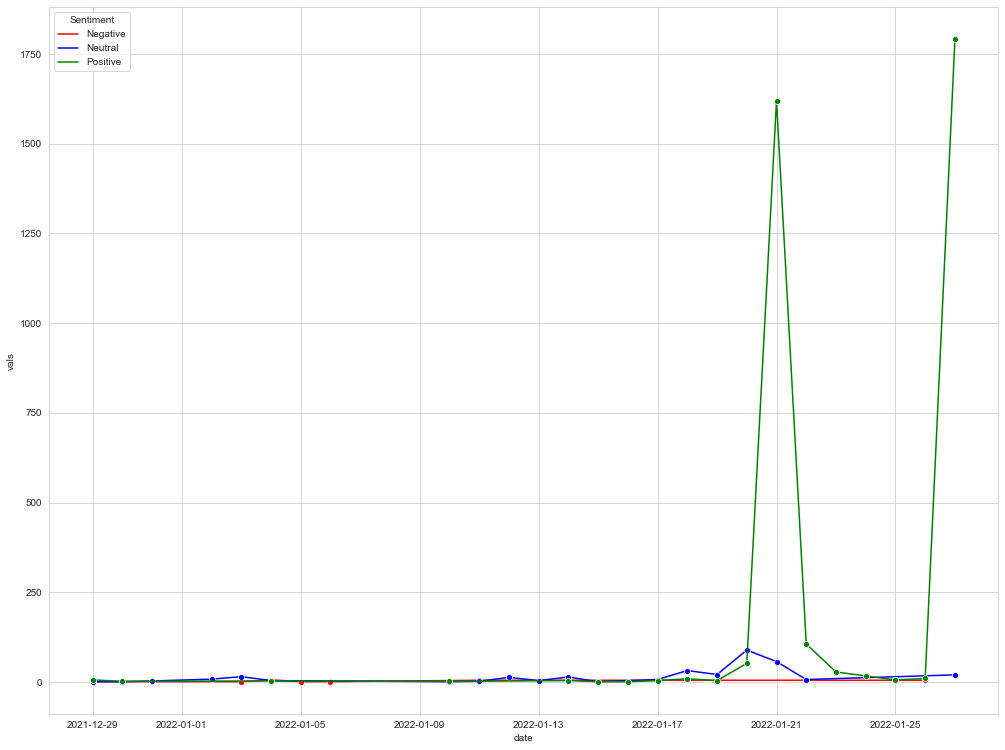

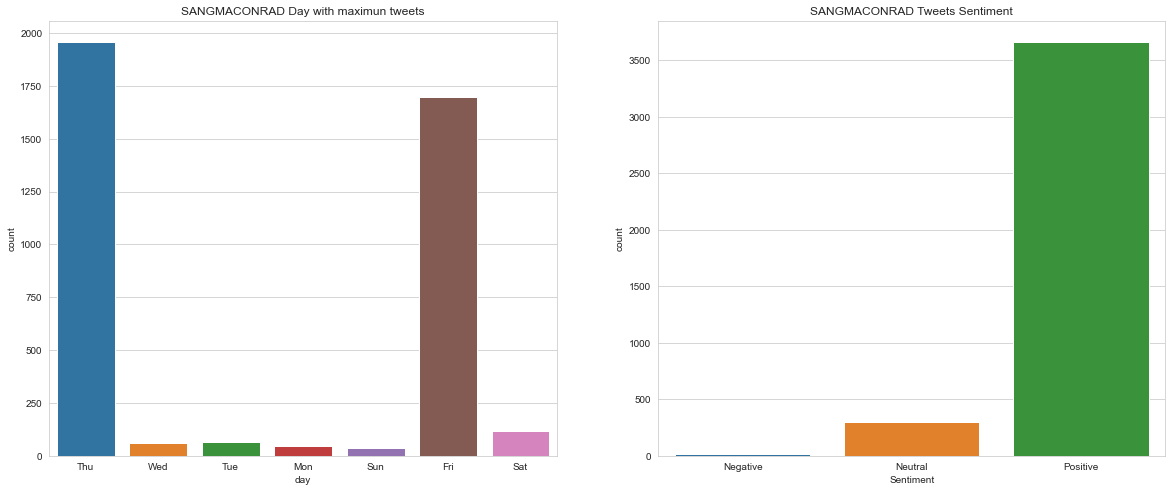

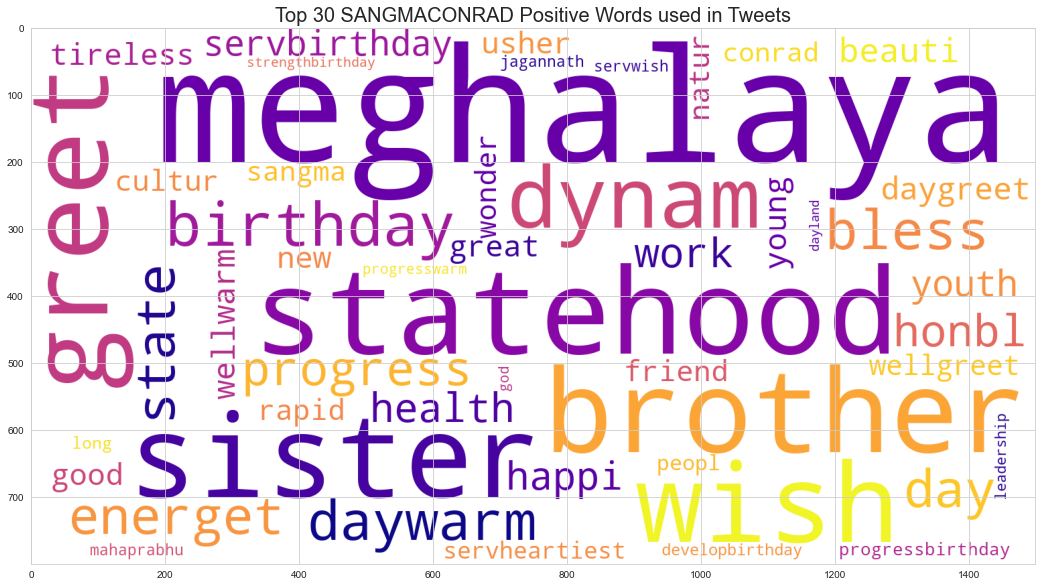

In [80]:
draw_graphs('SangmaConrad')

NPPPARTY


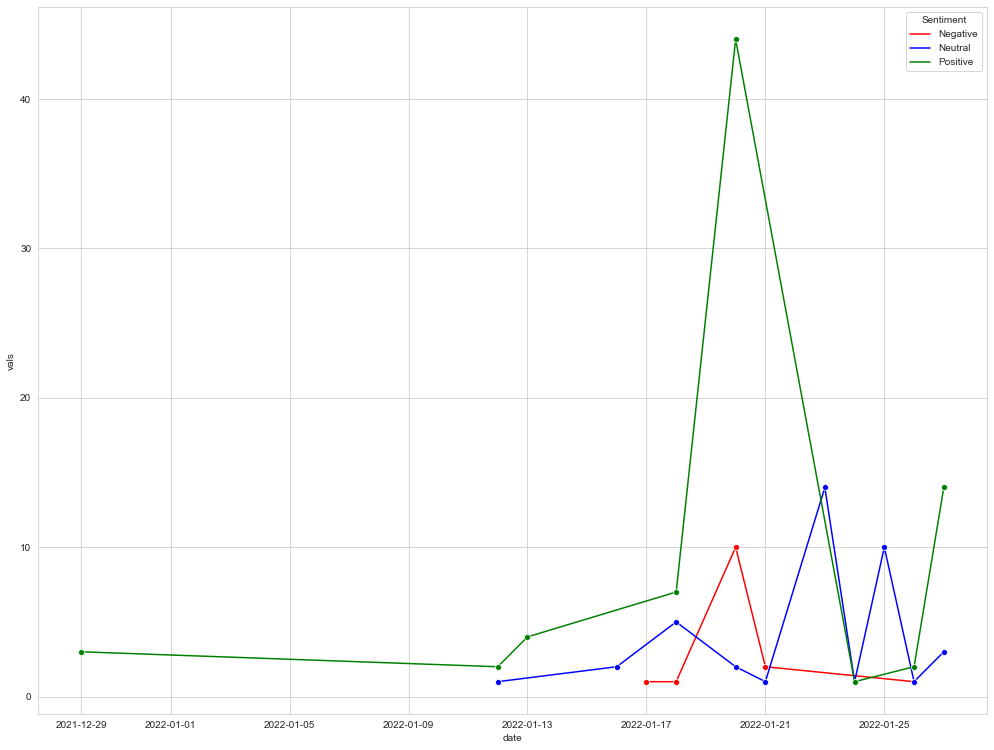

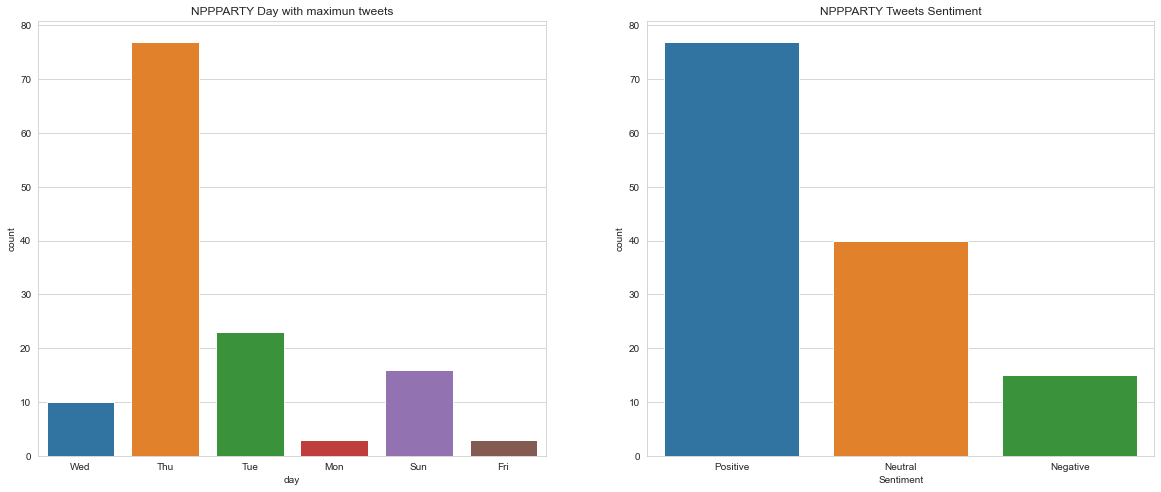

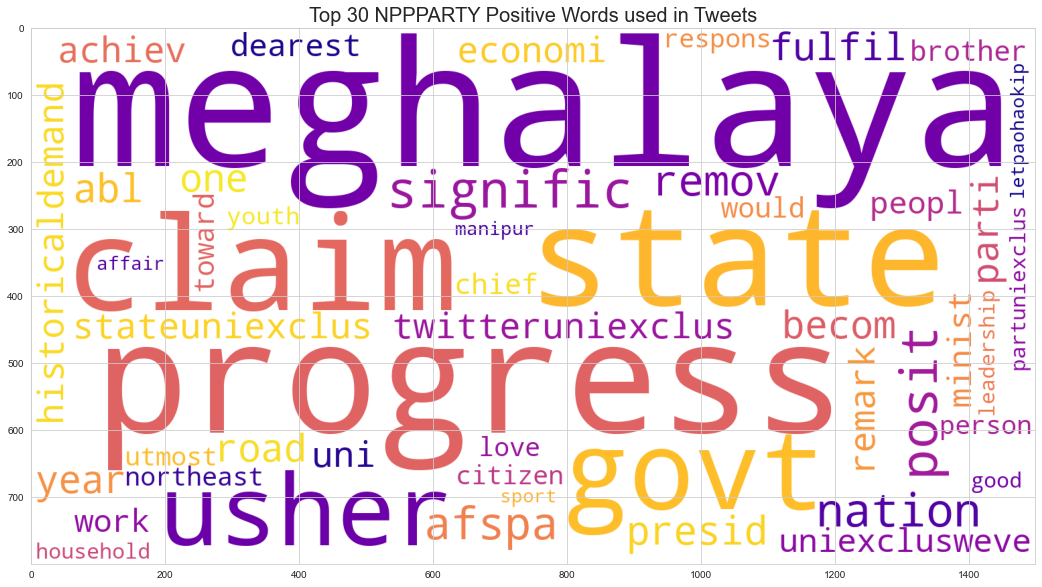

In [81]:
draw_graphs('NPPPARTY')

MukulSangma


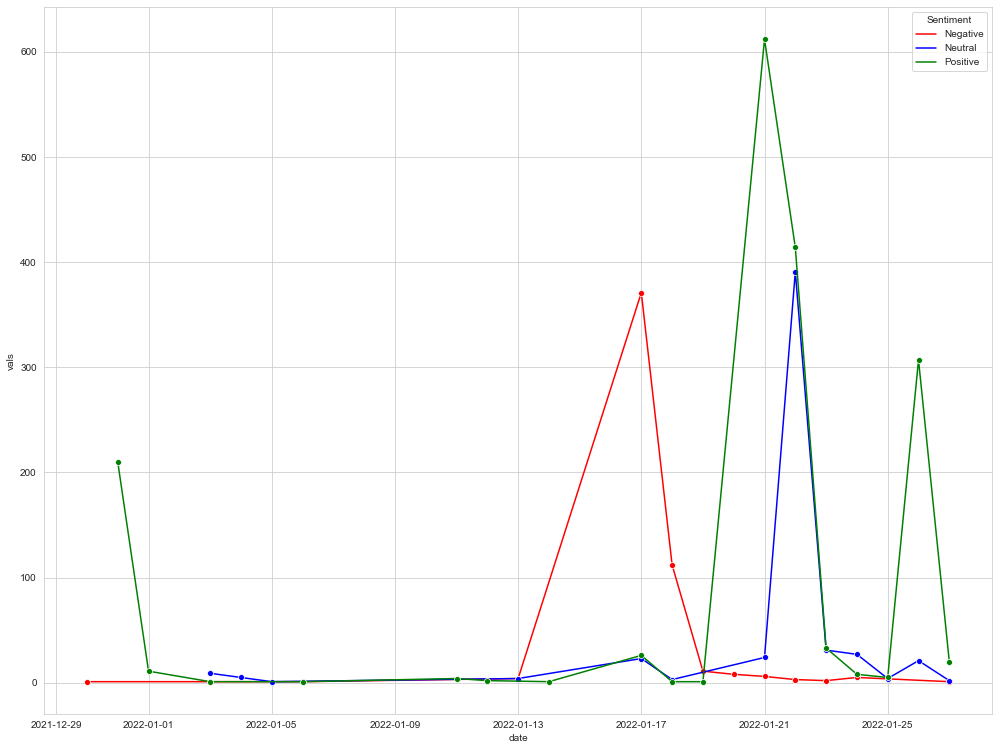

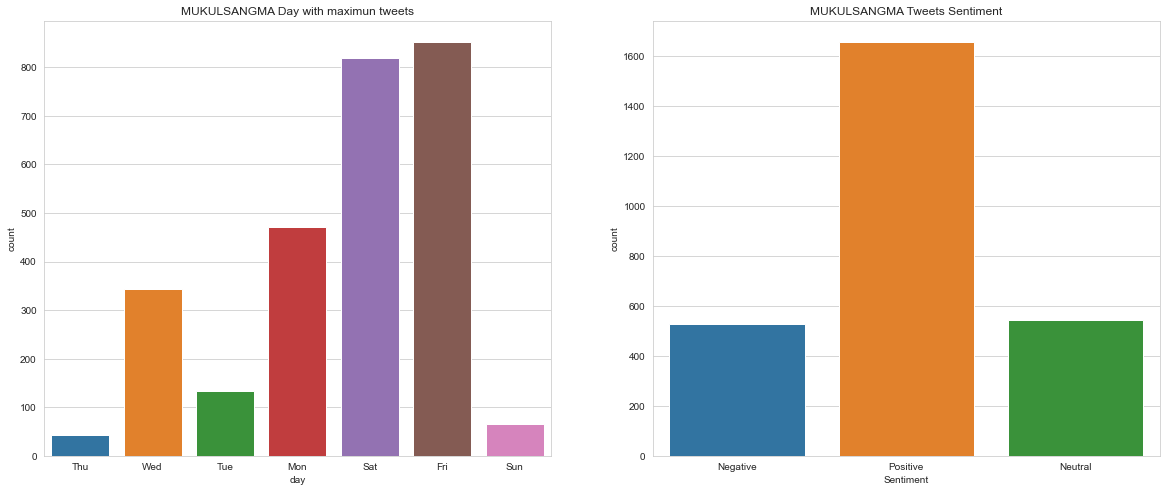

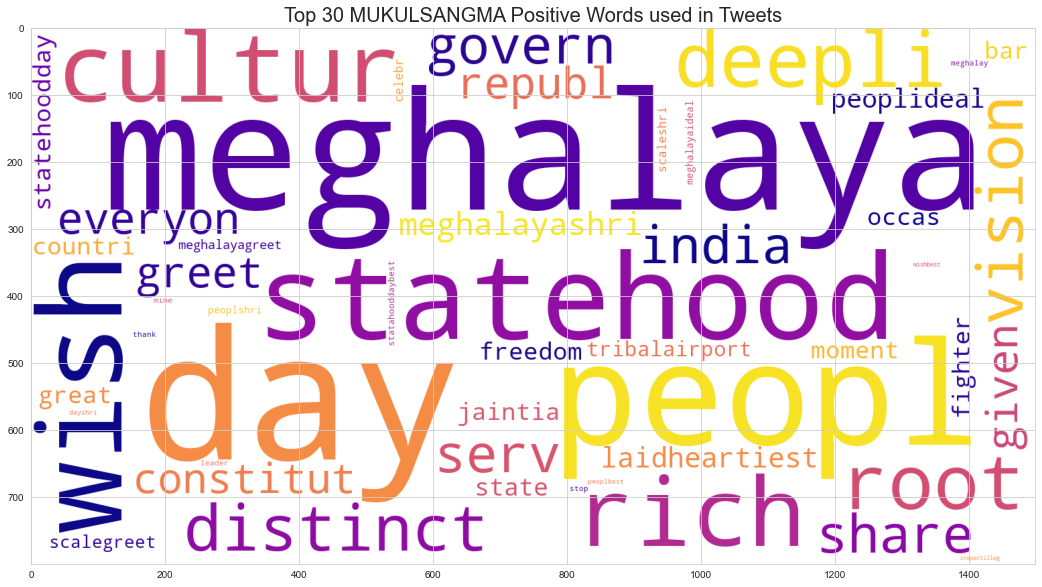

In [82]:
draw_graphs('MukulSangma')

INCPARTY


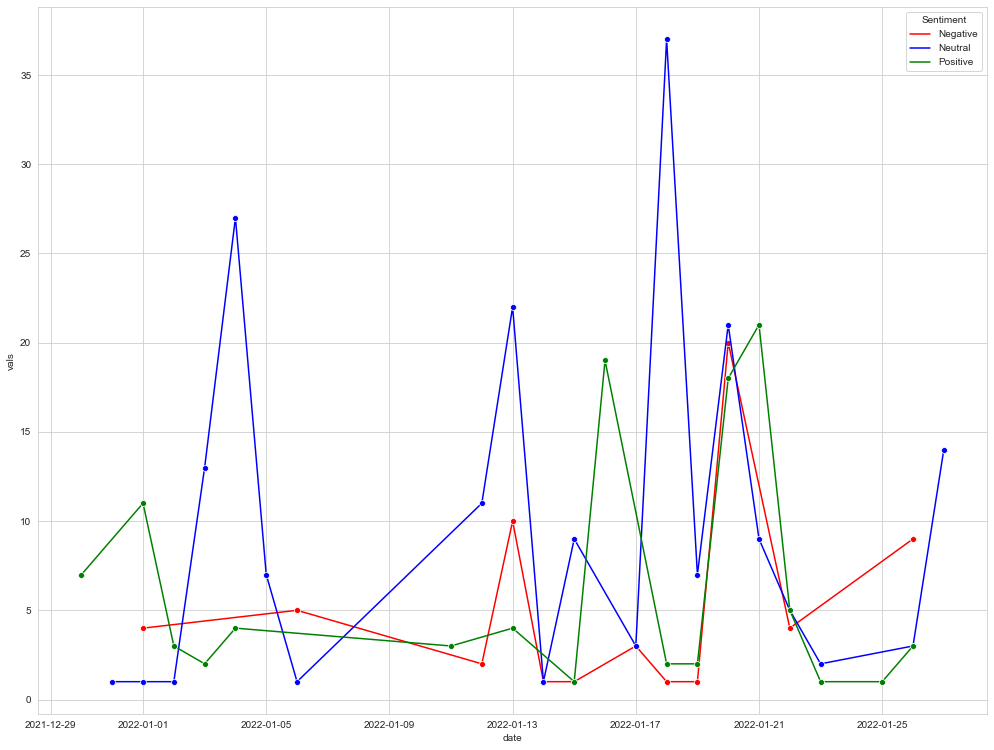

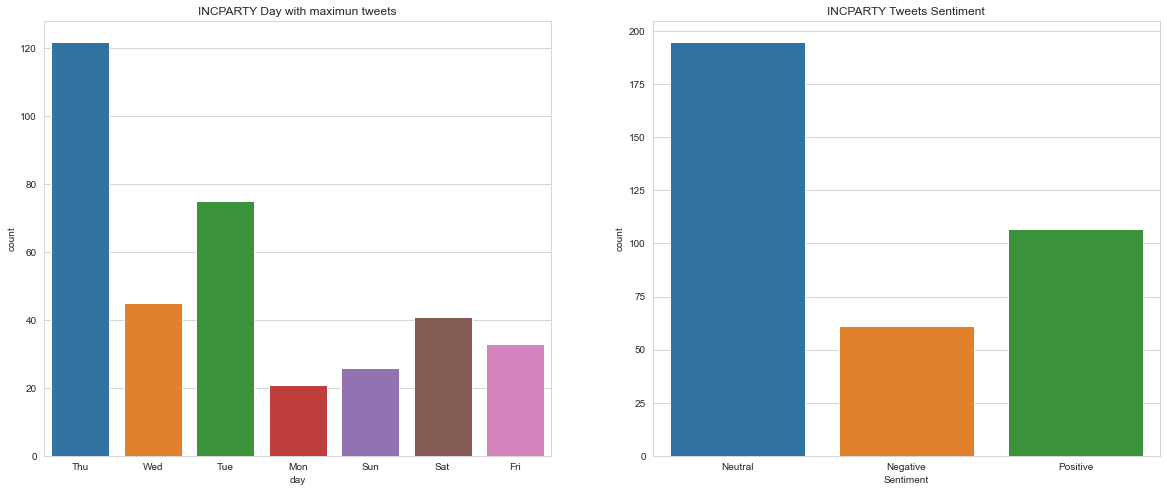

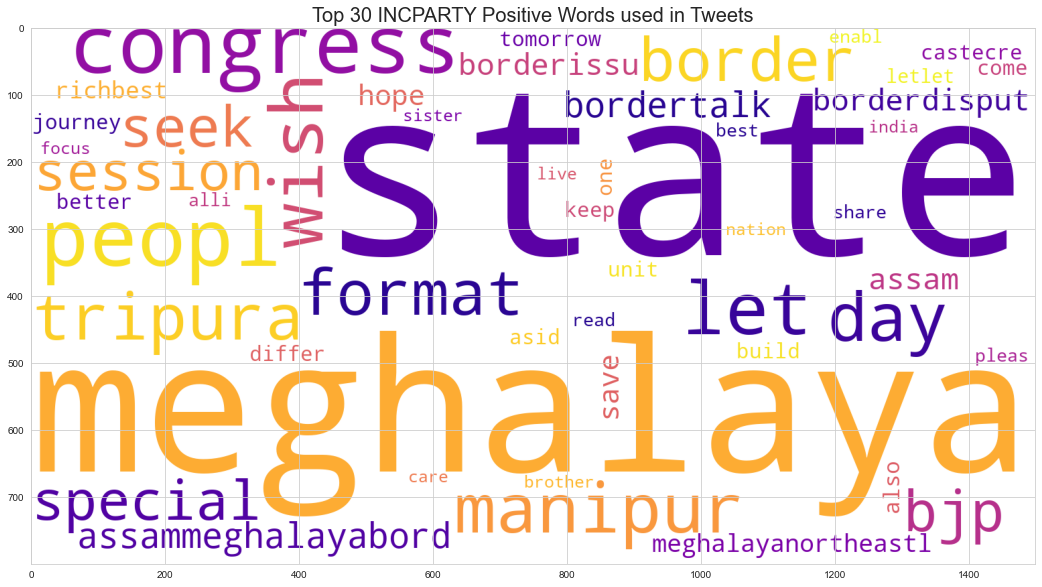

In [83]:
draw_graphs('INCPARTY')

In [84]:
# for p in politicians:
#     draw_graphs(p)

In [60]:
#  df['date'] = pd.to_datetime(df['date']).dt.date
#     negative_data = df[df['Sentiment']=='Negative'].reset_index()
#     positive_data = df[df['Sentiment']=='Positive'].reset_index()
#     grouped_data_neg = negative_data.groupby('date')['Sentiment'].count().reset_index()
#     grouped_data_pos = positive_data.groupby('date')['Sentiment'].count().reset_index()
#     merged_data = pd.merge(grouped_data_neg, grouped_data_pos, left_on='date', right_on='date', suffixes=(' Negative', ' Positive'))
#     ax = merged_data.plot(x='date', y=['Sentiment Negative', 'Sentiment Positive'], figsize=(14, 8), marker='o', xlabel='Date', ylabel='Count', title='Tweet count over a period of time')
    
#     temp = df.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
#     temp.style.background_gradient(cmap='Greens')